# **Mengimpor libraries**

In [ ]:
!pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=055e6fe601418d6aaa797871c36873e77fd703035bdfdad407726072a65002af
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
!pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.2 MB/s eta 0:00:00


In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
from scipy import stats
import pandas as pd
import numpy as np
import base64,os,random,gc
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno


import matplotlib.pyplot as plotter
import matplotlib.pyplot as plt
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import optuna
import xgboost as xgb
from xgboost import XGBRegressor
import catboost
from catboost import CatBoostRegressor
import lightgbm as lgbm
from lightgbm import LGBMRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import eli5
from eli5.sklearn import PermutationImportance

import warnings
warnings.filterwarnings('ignore')

# **Mengambil dataset**

In [ ]:
train = pd.read_csv("housing_price_dataset.csv")
train, test = train_test_split(train, test_size=0.2, random_state=42)
train=train.reset_index(drop=True)
test=test.reset_index(drop=True)
display(train.head())
display(test.head())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2498,2,3,Rural,2021,288178.195769
1,2380,5,3,Urban,1977,374155.921378
2,2274,5,2,Urban,1957,242571.549240
3,2215,5,1,Suburb,1977,150048.317779
4,2078,2,3,Suburb,1962,241134.908315


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,1894,5,1,Rural,1975,170835.035713
1,1001,5,3,Suburb,1963,126913.469998
2,2264,4,3,Suburb,1964,246611.883092
3,2299,5,1,Suburb,1999,244250.462969
4,2651,2,1,Suburb,1951,271127.650112


# **EDA**

Training dataset


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

Training dataset


SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64

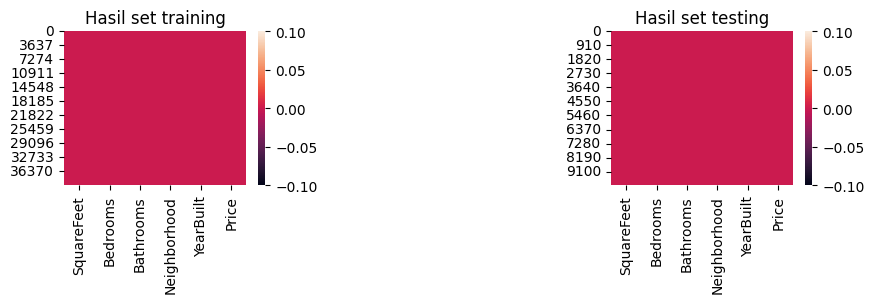

In [ ]:
print('Training dataset')
display(train.isnull().sum())
print('Training dataset')
display(test.isnull().sum())

plt.figure(figsize = (10, 2))

plt.subplot(1, 3, 1)
plt.title("Hasil set training")
sns.heatmap(train.isnull())

plt.subplot(1, 3, 3)
plt.title("Hasil set testing")
sns.heatmap(test.isnull())
plt.show()

# **Mengecek dataset**
Dataset di training dan testing untuk mengetahui tidak ada data yang tidak memiliki nilai Dataframe dan mengecek data tipe di setiap kolom

<Axes: >

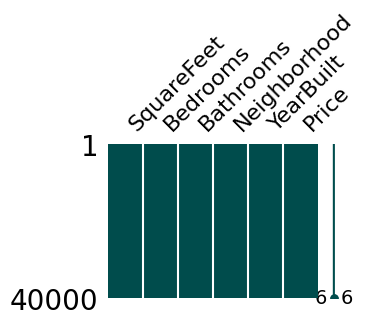

In [ ]:
msno.matrix(df=train, figsize=(3,2), color=(0,.3,.3))

<Axes: >

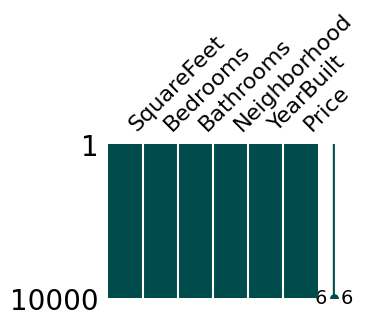

In [ ]:
msno.matrix(df=test, figsize=(3,2), color=(0,.3,.3))

In [ ]:
print('Training dataset')
display(train.info())
print('Testing dataset')
display(test.info())

Training dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    40000 non-null  int64  
 1   Bedrooms      40000 non-null  int64  
 2   Bathrooms     40000 non-null  int64  
 3   Neighborhood  40000 non-null  object 
 4   YearBuilt     40000 non-null  int64  
 5   Price         40000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.8+ MB


None

Testing dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    10000 non-null  int64  
 1   Bedrooms      10000 non-null  int64  
 2   Bathrooms     10000 non-null  int64  
 3   Neighborhood  10000 non-null  object 
 4   YearBuilt     10000 non-null  int64  
 5   Price         10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


None

Mengubah data tipe kolom **Neighborhood** dari object ke integer

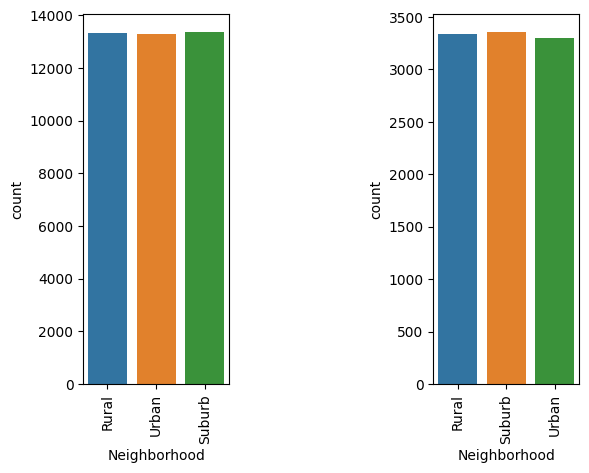

In [ ]:
plt.subplot(1, 3, 1)
sns.countplot(x = train["Neighborhood"])
plotter.xticks(rotation = 90);

plt.subplot(1, 3, 3)
sns.countplot(x = test["Neighborhood"])
plotter.xticks(rotation = 90);
plt.show()

In [ ]:
train["Neighborhood"] = train["Neighborhood"].replace({'Rural':1,'Urban':2,'Suburb':3})
test["Neighborhood"] = test["Neighborhood"].replace({'Rural':1,'Urban':2,'Suburb':3})

display(train)
display(test)

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2498,2,3,1,2021,288178.195769
1,2380,5,3,2,1977,374155.921378
2,2274,5,2,2,1957,242571.549240
3,2215,5,1,3,1977,150048.317779
4,2078,2,3,3,1962,241134.908315
...,...,...,...,...,...,...
39995,2166,5,3,3,1996,324396.846219
39996,2463,4,1,2,1953,319266.944411
39997,2812,4,2,2,2010,248092.662727
39998,2188,3,1,2,1979,132414.177622


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,1894,5,1,1,1975,170835.035713
1,1001,5,3,3,1963,126913.469998
2,2264,4,3,3,1964,246611.883092
3,2299,5,1,3,1999,244250.462969
4,2651,2,1,3,1951,271127.650112
...,...,...,...,...,...,...
9995,2005,3,3,2,1966,199265.817701
9996,1725,4,2,3,1960,241869.621812
9997,2885,3,2,2,1980,352184.123976
9998,1674,5,2,2,1967,244830.805238


## **Mengombinasikan hasil traning dan testing dataset untuk proses analisis data**

In [ ]:
df=train._append(test,ignore_index=True)
df

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2498,2,3,1,2021,288178.195769
1,2380,5,3,2,1977,374155.921378
2,2274,5,2,2,1957,242571.549240
3,2215,5,1,3,1977,150048.317779
4,2078,2,3,3,1962,241134.908315
...,...,...,...,...,...,...
49995,2005,3,3,2,1966,199265.817701
49996,1725,4,2,3,1960,241869.621812
49997,2885,3,2,2,1980,352184.123976
49998,1674,5,2,2,1967,244830.805238


In [ ]:
train_feature = train.columns.drop('Price').tolist()
train_feature

['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt']

In [ ]:
train[train_feature].describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[0])\
        .background_gradient(subset=['std'], cmap='BuPu')\
        .background_gradient(subset=['50%'], cmap='Reds')

,count,mean,std,min,25%,50%,75%,max
SquareFeet,40000.000000,2005.959300,575.235245,1000.000000,1512.000000,2008.000000,2506.000000,2999.000000
Bedrooms,40000.000000,3.503100,1.115043,2.000000,3.000000,4.000000,4.000000,5.000000
Bathrooms,40000.000000,1.997200,0.816002,1.000000,1.000000,2.000000,3.000000,3.000000
Neighborhood,40000.000000,2.000750,0.816986,1.000000,1.000000,2.000000,3.000000,3.000000
YearBuilt,40000.000000,1985.390125,20.687968,1950.000000,1967.000000,1985.000000,2003.000000,2021.000000


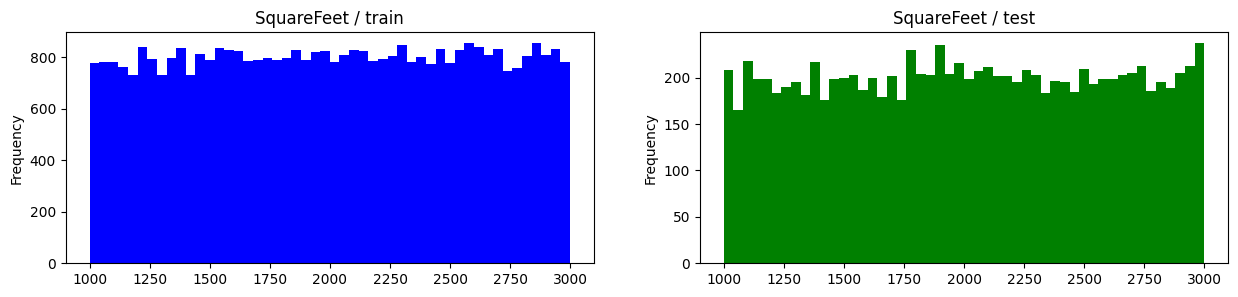

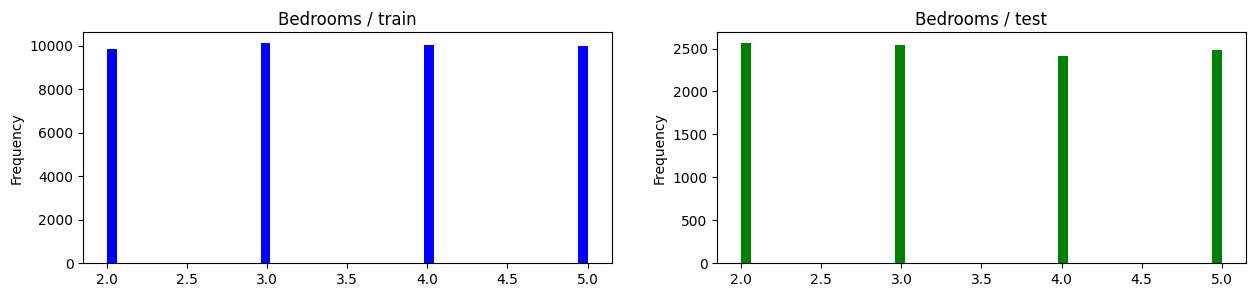

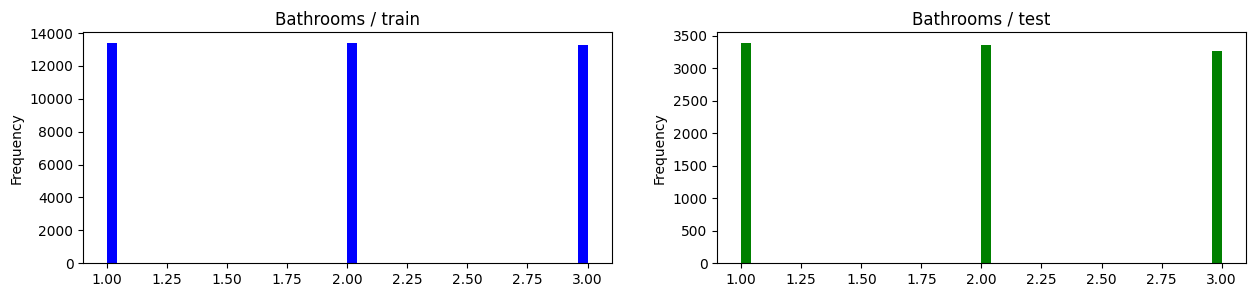

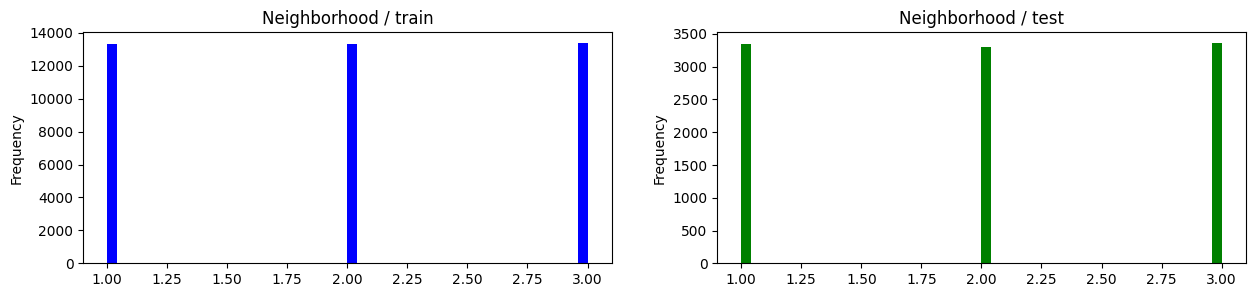

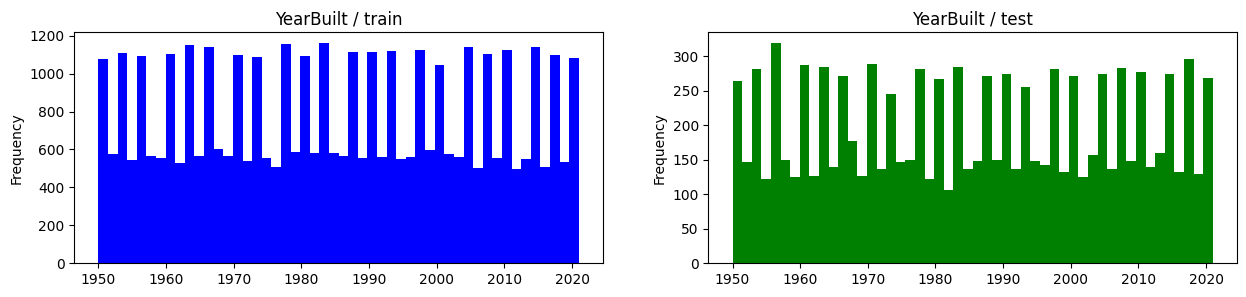

In [ ]:
for feat in train_feature:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    train[feat].plot(kind='hist', bins=50, color='blue')
    plt.title(feat + ' / train')
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    test[feat].plot(kind='hist', bins=50, color='green')
    plt.title(feat + ' / test')
    plt.show()

In [ ]:
print("Skewness: %f" % df['SquareFeet'].skew())
print("Kurtosis: %f" % df['SquareFeet'].kurt())
print("Skewness: %f" % df['Bedrooms'].skew())
print("Kurtosis: %f" % df['Bedrooms'].kurt())
print("Skewness: %f" % df['Bathrooms'].skew())
print("Kurtosis: %f" % df['Bathrooms'].kurt())
print("Skewness: %f" % df['Neighborhood'].skew())
print("Kurtosis: %f" % df['Neighborhood'].kurt())
print("Skewness: %f" % df['YearBuilt'].skew())
print("Kurtosis: %f" % df['YearBuilt'].kurt())

Skewness: -0.011162
Kurtosis: -1.189926
Skewness: 0.004640
Kurtosis: -1.356057
Skewness: 0.008408
Kurtosis: -1.497577
Skewness: -0.001655
Kurtosis: -1.502886
Skewness: 0.005557
Kurtosis: -1.196839


In [ ]:
train = pd.DataFrame(df).head(40000)
test = pd.DataFrame(df).tail(10000)
test =  test.reset_index(drop=True)
display(train.describe())
display(test.describe())

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,2005.959300,3.503100,1.997200,2.000750,1985.390125,224795.672948
std,575.235245,1.115043,0.816002,0.816986,20.687968,76236.358275
min,1000.000000,2.000000,1.000000,1.000000,1950.000000,-36588.165397
25%,1512.000000,3.000000,1.000000,1.000000,1967.000000,169696.292352
50%,2008.000000,4.000000,2.000000,2.000000,1985.000000,225097.074580
75%,2506.000000,4.000000,3.000000,3.000000,2003.000000,279499.666343
max,2999.000000,5.000000,3.000000,3.000000,2021.000000,492195.259972


,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2008.036200,3.481100,1.988300,2.001500,1985.461600,224953.933961
std,576.649698,1.121324,0.815248,0.818514,20.845479,75766.268317
min,1000.000000,2.000000,1.000000,1.000000,1950.000000,-18159.685676
25%,1514.000000,2.000000,1.000000,1.000000,1967.000000,171325.969743
50%,2006.000000,3.000000,2.000000,2.000000,1986.000000,224862.129346
75%,2505.000000,4.000000,3.000000,3.000000,2004.000000,279078.673445
max,2999.000000,5.000000,3.000000,3.000000,2021.000000,463977.238482


# **Seleksi fitur**

XGBRegressor

XGBRegressor: 
 [0.8444054  0.05181498 0.03623961 0.03282103 0.03471894]


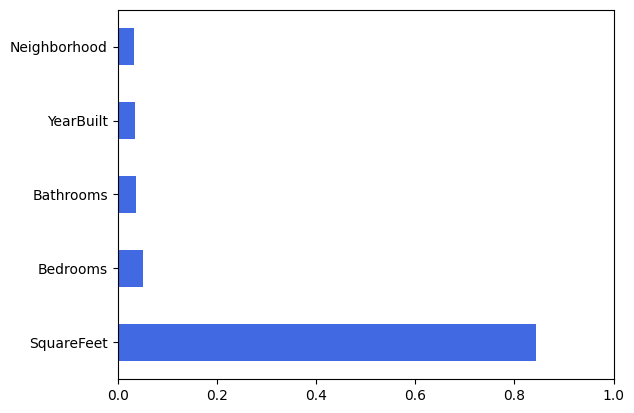

In [ ]:
X_data_feature= train.drop(columns=['Price'],axis=1)
y_data_feature= train['Price']

model = [XGBRegressor()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 1.0)
    plt.show()

LGBMRegressor

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001955 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 341
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 5
[LightGBM] [Info] Start training from score 224795.672923
LGBMRegresso: 
 [1400  407  237  184  772]


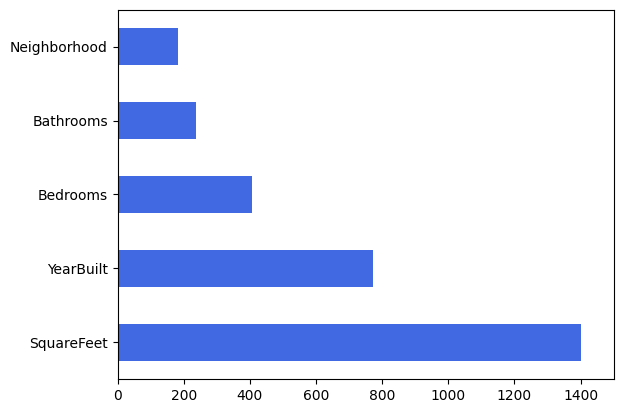

In [ ]:
model = [LGBMRegressor()]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 1500)
    plt.show()

CatBoostRegressor

<catboost.co: 
 [73.39360172  6.87265859  4.31766684  3.66377037 11.75230248]


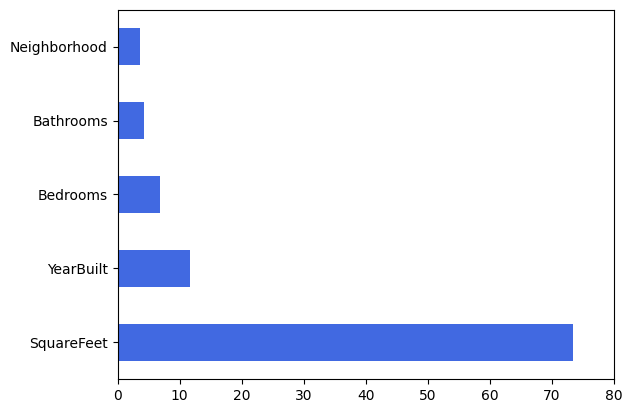

In [ ]:
model = [CatBoostRegressor(logging_level='Silent')]

model = [model[i].fit(X_data_feature,y_data_feature) for i in range(len(model))]

num_chr = [12, 12, 10]

for i in range(len(model)):
    print(str(model[i])[:num_chr[i]] + ': \n',
          model[i].feature_importances_)
    feat_importances = pd.Series(model[i].feature_importances_,
                                 index=X_data_feature.columns)
    feat_importances.nlargest(10).plot(kind='barh', color='royalblue')
    plt.xlim(0, 80)
    plt.show()

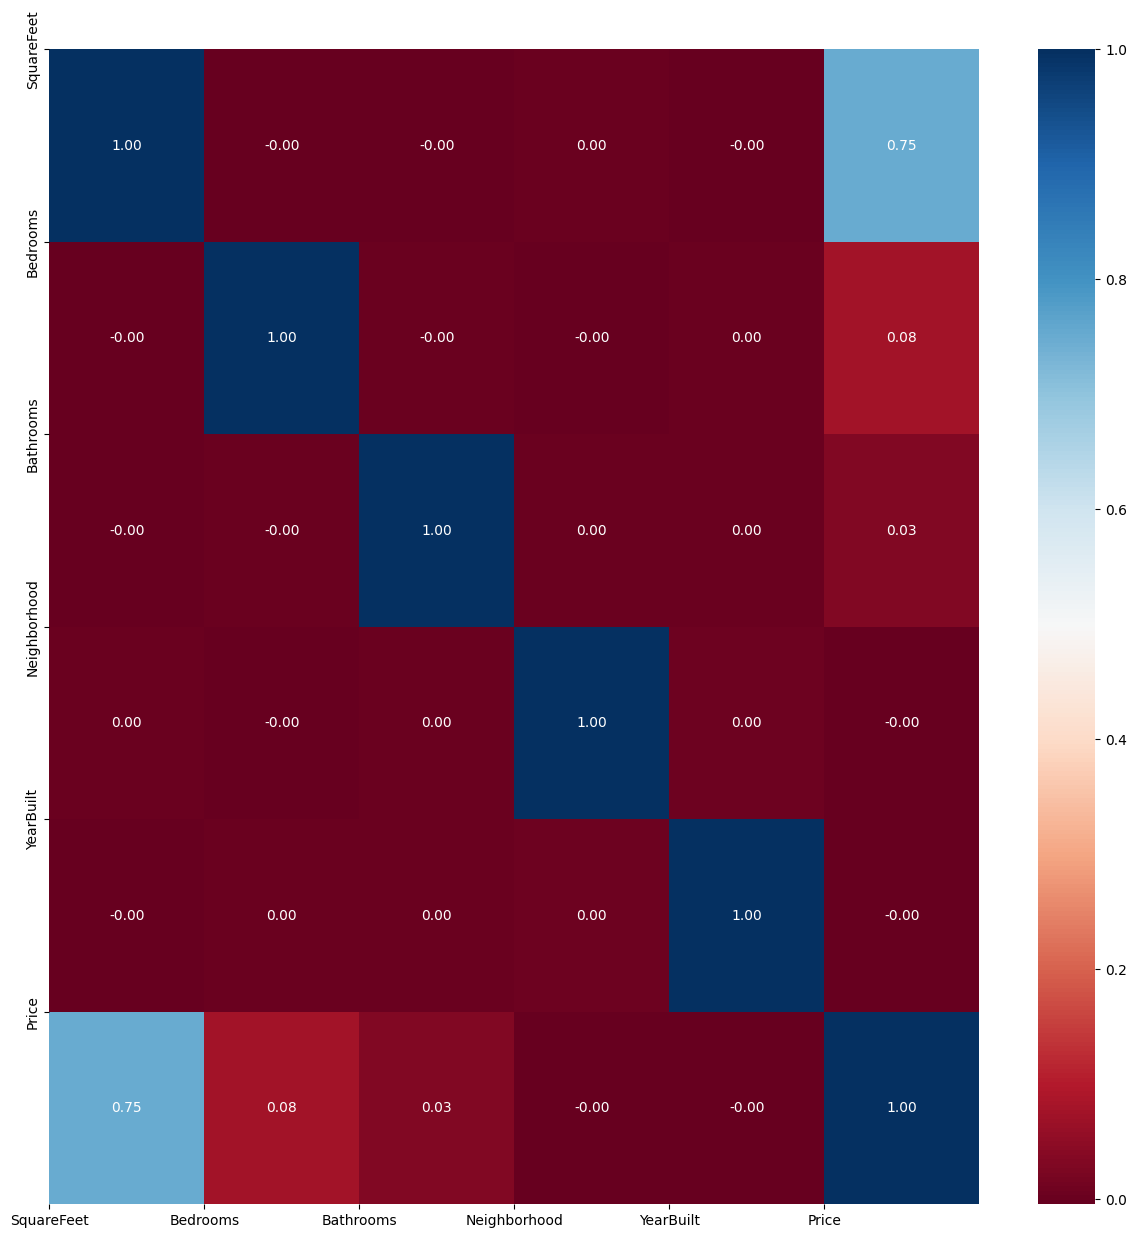

In [ ]:
corr = train.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [ ]:
X= train.drop(columns=['Price','Neighborhood','YearBuilt'],axis=1)
y= train['Price']

In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler, MaxAbsScaler,QuantileTransformer
from sklearn.preprocessing import PowerTransformer,Normalizer,OrdinalEncoder,FunctionTransformer

In [ ]:
X_train=X
y_train=y

StandardScaler = StandardScaler()
X_train = StandardScaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train

,0,1,2
0,0.855384,-1.348036,1.228934
1,0.650248,1.342476,1.228934
2,0.465973,1.342476,0.003431
3,0.363405,1.342476,-1.222072
4,0.125239,-1.348036,1.228934
...,...,...,...
39995,0.278221,1.342476,1.228934
39996,0.794538,0.445639,-1.222072
39997,1.401254,0.445639,0.003431
39998,0.316467,-0.451199,-1.222072


# **Modelling**

In [ ]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train, test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (32000, 3)
Shape of X_eval:  (8000, 3)
Shape of y_train:  (32000,)
Shape of y_eval (8000,)


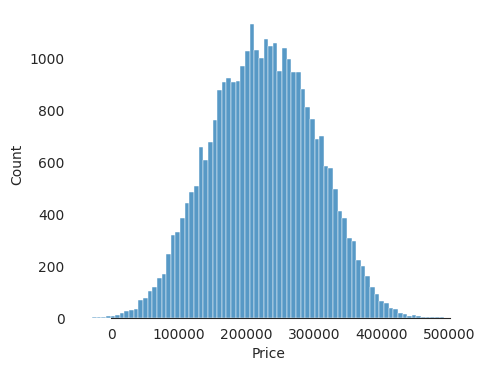

Skewness: -0.011181
Kurtosis: -0.394284


In [ ]:
sns.set_style("white")
sns.set_color_codes(palette='deep')
f, ax = plt.subplots(figsize=(5, 4))
sns.histplot(y_train)
ax.xaxis.grid(False)

sns.despine(trim=True, left=True)
plt.show()

print("Skewness: %f" % y_train.skew())
print("Kurtosis: %f" % y_train.kurt())

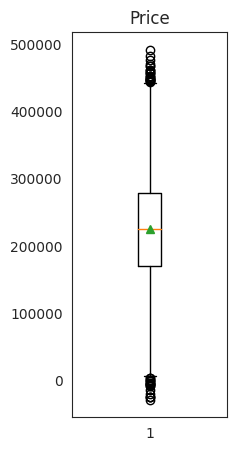

In [ ]:
plt.figure(figsize=(2,5))
plt.boxplot(y_train,showmeans=True)
plt.title('Price')
plt.show()

In [ ]:
def objective(trial):
   params = {
        'n_estimators'    :trial.suggest_int('n_estimators', 300, 4000),
       'learning_rate':     trial.suggest_loguniform("learning_rate", 0.01, 0.1),
       'max_depth':         trial.suggest_int("max_depth", 2, 6),
       'min_child_weight':  trial.suggest_loguniform("min_child_weight", 0.001, 10),
       'subsample':         trial.suggest_discrete_uniform("subsample", 0.1, 1.0, 0.025),
       'colsample_bytree':  trial.suggest_discrete_uniform("colsample_bytree",  0.1, 1.0, 0.025),
       'colsample_bylevel': trial.suggest_discrete_uniform("colsample_bylevel",  0.1, 1.0, 0.025),
       'gamma':             trial.suggest_loguniform("gamma", 1e-10, 10),
       'reg_lambda':        trial.suggest_loguniform("reg_lambda", 1e-10, 100),
       'reg_alpha':         trial.suggest_loguniform("reg_alpha", 1e-10, 100),
   }

   model = xgb.XGBRegressor(**params,objective='reg:absoluteerror')
   model.fit(X_train,y_train)
   y_pred = model.predict(X_train)
   score = median_absolute_error(y_train, y_pred)

   return score

In [ ]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=123))
study.optimize(objective, n_trials=50)
study.best_params

{'n_estimators': 2565,
 'learning_rate': 0.09732287808197748,
 'max_depth': 6,
 'min_child_weight': 0.007737991528812258,
 'subsample': 0.1,
 'colsample_bytree': 1.0,
 'colsample_bylevel': 0.9,
 'gamma': 1.3007598689577686,
 'reg_lambda': 9.683728618282095e-06,
 'reg_alpha': 0.08617584406570492}

In [ ]:
def objective(trial):
   params = {
        'n_estimators'    :trial.suggest_int('n_estimators', 300, 4000),
       'learning_rate':     trial.suggest_loguniform("learning_rate", 0.01, 0.1),
       'max_depth':         trial.suggest_int("max_depth", 2, 6),
       'min_child_weight':  trial.suggest_loguniform("min_child_weight", 0.001, 10),
       'subsample':         trial.suggest_discrete_uniform("subsample", 0.1, 1.0, 0.025),
       'colsample_bytree':  trial.suggest_discrete_uniform("colsample_bytree",  0.1, 1.0, 0.025),
       'reg_lambda':        trial.suggest_loguniform("reg_lambda", 1e-10, 100),
       'reg_alpha':         trial.suggest_loguniform("reg_alpha", 1e-10, 100),
   }

   model = lgbm.LGBMRegressor(**params,objective='regression_l1')
   model.fit(X_train,y_train)
   y_pred = model.predict(X_train)
   score = median_absolute_error(y_train, y_pred)

   return score

In [ ]:
study = optuna.create_study(sampler=optuna.samplers.RandomSampler(seed=123))
study.optimize(objective, n_trials=50)
study.best_params

Output streaming akan dipotong hingga 5000 baris terakhir.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

{'n_estimators': 1181,
 'learning_rate': 0.06423786321404049,
 'max_depth': 6,
 'min_child_weight': 0.001488989270621618,
 'subsample': 0.375,
 'colsample_bytree': 1.0,
 'reg_lambda': 0.00029789133493955363,
 'reg_alpha': 0.0032787804772753852}

Evaluasi model XGB dan LGBM

In [ ]:
params_XGB_best ={'n_estimators': 2565,
 'learning_rate': 0.09732287808197748,
 'max_depth': 6,
 'min_child_weight': 0.007737991528812258,
 'subsample': 0.1,
 'colsample_bytree': 1.0,
 'colsample_bylevel': 0.9,
 'gamma': 1.3007598689577686,
 'reg_lambda': 9.683728618282095e-06,
 'reg_alpha': 0.08617584406570492}

In [ ]:
params_LGBM_best ={'n_estimators': 2309,
 'learning_rate': 0.04942932762026841,
 'max_depth': 6,
 'min_child_weight': 0.21030657642741743,
 'subsample': 0.30000000000000004,
 'colsample_bytree': 0.775,
 'reg_lambda': 0.21539132638034386,
 'reg_alpha': 2.5398950960373498e-08}

In [ ]:
XGBRegressor_model = xgb.XGBRegressor(**params_XGB_best,objective='reg:absoluteerror').fit(X_train,y_train)
LGBM_model = lgbm.LGBMRegressor(**params_LGBM_best,objective='regression_l1').fit(X_train,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001123 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 264
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 3
[LightGBM] [Info] Start training from score 225109.531250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning]

In [ ]:
cv_XGBoost = cross_val_score(estimator = XGBRegressor_model, X = X_train, y = y_train, cv = 5)
y_pred_XGBoost_eval = XGBRegressor_model.predict(X_eval)
r2_score_XGBoost_eval = r2_score(y_eval, y_pred_XGBoost_eval)
MedAE_XGBoost = (np.sqrt(median_absolute_error(y_eval, y_pred_XGBoost_eval)))
print("CV: ", cv_XGBoost.mean())
print('R2_score (eval): ', r2_score_XGBoost_eval)
print("MedAE: ", MedAE_XGBoost)

CV:  0.5313567693608775
R2_score (eval):  0.5352705575275362
MedAE:  186.59938010200517


In [ ]:
cv_LGBM = cross_val_score(estimator = LGBM_model, X = X_train, y = y_train, cv = 5)
y_pred_LGBM_eval = LGBM_model.predict(X_eval)
r2_score_LGBM_eval = r2_score(y_eval, y_pred_LGBM_eval)
MedAE_LGBM = (np.sqrt(median_absolute_error(y_eval, y_pred_LGBM_eval)))
print("CV: ", cv_LGBM.mean())
print('R2_score (eval): ', r2_score_LGBM_eval)
print("MedAE: ", MedAE_LGBM)

Output streaming akan dipotong hingga 5000 baris terakhir.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

Mengonversi menjadi Dataframe untuk mengobservasi hasil evaluasi

In [ ]:
models = [('XGB', MedAE_XGBoost,  r2_score_XGBoost_eval, cv_XGBoost.mean()),
        ( 'LGBM', MedAE_LGBM, r2_score_LGBM_eval, cv_LGBM.mean())
         ]


predict = pd.DataFrame(data = models, columns=['Model', 'MedAE', 'R2_Score(eval)', 'Cross-Validation'])
predict

,Model,MedAE,R2_Score(eval),Cross-Validation
0,XGB,186.599380,0.535271,0.531357
1,LGBM,186.173411,0.555945,0.557675


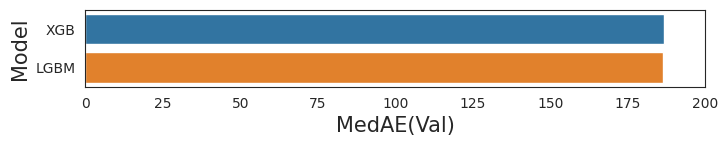

In [ ]:
f, axe = plt.subplots(1,1, figsize=(8,1))

predict.sort_values(by=['MedAE'], ascending=False, inplace=True)

sns.barplot(x='MedAE', y='Model',  data = predict, ax = axe)
axe.set_xlabel('MedAE(Val)', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,200.0)
plt.show()

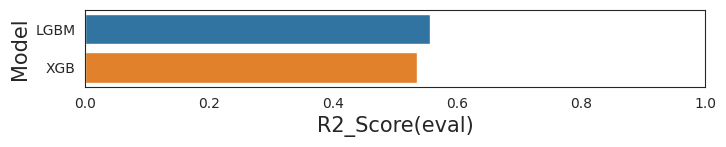

In [ ]:
f, axe = plt.subplots(1,1, figsize=(8,1))

predict.sort_values(by=['R2_Score(eval)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(eval)', y='Model',  data = predict, ax = axe)
axe.set_xlabel('R2_Score(eval)', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,1.0)
plt.show()

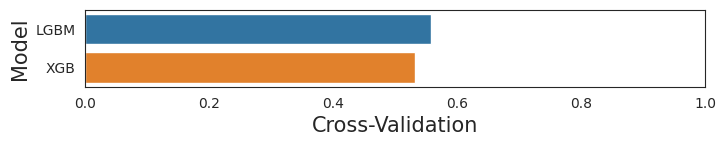

In [ ]:
f, axe = plt.subplots(1,1, figsize=(8,1))

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model',  data = predict, ax = axe)
axe.set_xlabel('Cross-Validation', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,1.0)
plt.show()

**LGBM lebih baik dari XGB**

# **Mengetes sistem prediksi**

In [ ]:
import_test0 = test.reset_index(drop=True)
import_test = import_test0.drop(columns=['Price','Neighborhood','YearBuilt'],axis=1)
import_test

,SquareFeet,Bedrooms,Bathrooms
0,1894,5,1
1,1001,5,3
2,2264,4,3
3,2299,5,1
4,2651,2,1
...,...,...,...
9995,2005,3,3
9996,1725,4,2
9997,2885,3,2
9998,1674,5,2


In [ ]:
import_train = X.reset_index(drop=True)
import_train

,SquareFeet,Bedrooms,Bathrooms
0,2498,2,3
1,2380,5,3
2,2274,5,2
3,2215,5,1
4,2078,2,3
...,...,...,...
39995,2166,5,3
39996,2463,4,1
39997,2812,4,2
39998,2188,3,1


In [ ]:
Row_Number=10000
X_test_target1_df=import_train._append(import_test,ignore_index=True)

from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()
X_test_target1_df = StandardScaler.fit_transform(X_test_target1_df)
test_pred_target0= pd.DataFrame(X_test_target1_df)
test_pred_target0 = pd.DataFrame(test_pred_target0).tail(Row_Number)
test_pred_target0

,0,1,2
40000,-0.195262,1.344872,-1.220113
40001,-1.746936,1.344872,1.231341
40002,0.447649,0.449067,1.231341
40003,0.508465,1.344872,-1.220113
40004,1.120099,-1.342543,-1.220113
...,...,...,...
49995,-0.002389,-0.446738,1.231341
49996,-0.488916,0.449067,0.005614
49997,1.526697,-0.446738,0.005614
49998,-0.577533,1.344872,0.005614


In [ ]:
predict_XGB = XGBRegressor_model.predict(test_pred_target0)
predict_LGBM = LGBM_model.predict(test_pred_target0)

predict_XGB_df=pd.DataFrame(predict_XGB)
predict_LGBM_df=pd.DataFrame(predict_LGBM)

predict_XGB_df=predict_XGB_df.set_axis(axis=1,labels=['XGB_pred'])
predict_LGBM_df=predict_LGBM_df.set_axis(axis=1,labels=['LGBM_pred'])

display(predict_XGB_df.head())
display(predict_LGBM_df.head())

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).


,XGB_pred
0,228832.359375
1,144210.125000
2,266611.750000
3,246982.093750
4,263403.593750


,LGBM_pred
0,217863.527032
1,152000.548573
2,258755.140103
3,253114.133583
4,273190.354941


In [ ]:
test_pred=test.merge(predict_XGB_df,how='inner',left_index=True,right_index=True)
test_pred=test_pred.merge(predict_LGBM_df,how='inner',left_index=True,right_index=True)
test_pred

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price,XGB_pred,LGBM_pred
0,1894,5,1,1,1975,170835.035713,228832.359375,217863.527032
1,1001,5,3,3,1963,126913.469998,144210.125000,152000.548573
2,2264,4,3,3,1964,246611.883092,266611.750000,258755.140103
3,2299,5,1,3,1999,244250.462969,246982.093750,253114.133583
4,2651,2,1,3,1951,271127.650112,263403.593750,273190.354941
...,...,...,...,...,...,...,...,...
9995,2005,3,3,2,1966,199265.817701,217770.281250,228795.067267
9996,1725,4,2,3,1960,241869.621812,203320.718750,195039.566699
9997,2885,3,2,2,1980,352184.123976,299033.781250,304963.240166
9998,1674,5,2,2,1967,244830.805238,188079.046875,185801.778706


In [ ]:
r2_score_XGBoost_test = r2_score(test_pred['Price'], test_pred['XGB_pred'])
MedAE_XGBoost_test = (np.sqrt(median_absolute_error(test_pred['Price'], test_pred['XGB_pred'])))
print('R2_score (eval): ', r2_score_XGBoost_test)
print("MedAE: ", MedAE_XGBoost_test)

r2_score_LGBM_test = r2_score(test_pred['Price'], test_pred['LGBM_pred'])
MedAE_LGBM_test = (np.sqrt(median_absolute_error(test_pred['Price'], test_pred['LGBM_pred'])))
print('R2_score (eval): ', r2_score_LGBM_test)
print("MedAE: ", MedAE_LGBM_test)

R2_score (eval):  0.5467528343421337
MedAE:  184.99956979116507
R2_score (eval):  0.5660168322285046
MedAE:  183.84724170730294


In [ ]:
models_Compare0 = [ ('XGB', MedAE_XGBoost ,MedAE_XGBoost_test,r2_score_XGBoost_eval,r2_score_XGBoost_test),
                    ('LGBM', MedAE_LGBM ,MedAE_LGBM_test, r2_score_LGBM_eval,r2_score_LGBM_test)
                  ]

predict_Compare0 = pd.DataFrame(data = models_Compare0, columns=['Model', 'MedAE(eval)','MedAE(test)', 'R2_Score(eval)', 'R2_Score(test)'])
predict_Compare0.sort_values(by=['R2_Score(test)'], ascending=False)

,Model,MedAE(eval),MedAE(test),R2_Score(eval),R2_Score(test)
1,LGBM,186.173411,183.847242,0.555945,0.566017
0,XGB,186.599380,184.999570,0.535271,0.546753


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MedAE(eval)'].plot(kind='hist', bins=20, title='MedAE(eval)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MedAE(test)'].plot(kind='hist', bins=20, title='MedAE(test)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['R2_Score(eval)'].plot(kind='hist', bins=20, title='R2_Score(eval)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='index', y='MedAE(eval)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MedAE(eval)', y='MedAE(test)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='MedAE(test)', y='R2_Score(eval)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='R2_Score(eval)', y='R2_Score(test)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MedAE(eval)']
  ys = series['index']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('MedAE(eval)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedAE(eval)')
_ = plt.ylabel('index')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MedAE(eval)']
  ys = series['R2_Score(eval)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('MedAE(eval)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedAE(eval)')
_ = plt.ylabel('R2_Score(eval)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['MedAE(eval)']
  ys = series['R2_Score(test)']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('MedAE(eval)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedAE(eval)')
_ = plt.ylabel('R2_Score(test)')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['MedAE(eval)']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'MedAE(eval)'}, axis=1)
              .sort_values('MedAE(eval)', ascending=True))
  xs = counted['MedAE(eval)']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_12.sort_values('MedAE(eval)', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Model')):
  _plot_series(series, series_name, i)
  fig.legend(title='Model', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('MedAE(eval)')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_13['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['MedAE(eval)'].plot(kind='line', figsize=(8, 4), title='MedAE(eval)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['MedAE(test)'].plot(kind='line', figsize=(8, 4), title='MedAE(test)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_16['R2_Score(eval)'].plot(kind='line', figsize=(8, 4), title='R2_Score(eval)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_17['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_17, x='index', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='MedAE(eval)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='MedAE(test)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='R2_Score(eval)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

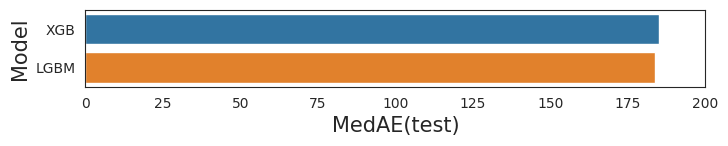

In [ ]:
f, axe = plt.subplots(1,1, figsize=(8,1))

predict_Compare0.sort_values(by=['MedAE(test)'], ascending=False, inplace=True)

sns.barplot(x='MedAE(test)', y='Model',  data = predict_Compare0, ax = axe)
axe.set_xlabel('MedAE(test)', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,200.0)
plt.show()

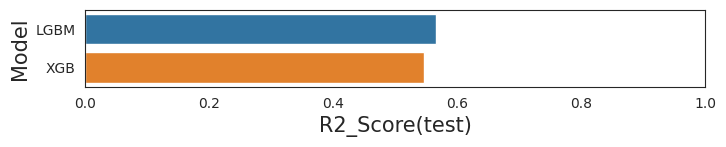

In [ ]:
f, axe = plt.subplots(1,1, figsize=(8,1))

predict_Compare0.sort_values(by=['R2_Score(test)'], ascending=False, inplace=True)

sns.barplot(x='R2_Score(test)', y='Model',  data = predict_Compare0, ax = axe)
axe.set_xlabel('R2_Score(test)', size=15)
axe.set_ylabel('Model', size=15)
axe.set_xlim(0,1.0)
plt.show()